# Linear Regression on Algerian Forest Fire Dataset

# importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# importing dataset and cleaning data

In [2]:
df = pd.read_csv('C:/Users/Dell/Downloads/Ineuron Datascience/EDA/Dataset/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.iloc[121:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
124,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0


In [4]:
# we need to drop row 122 and 123

# Dropping index 122 and 123

In [5]:
df.drop(index=[122,123],inplace=True)

In [6]:
df.reset_index(inplace=True)

In [7]:
df.drop('index',axis=1,inplace=True)

In [8]:
df.iloc[121:].head(4)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,1
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,0
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,0
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,0


# Creating Region

In [9]:
# creating region 0 for Bejaia region and 1 for sidi Bel-abbes region

In [10]:
df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [11]:
df.iloc[115:].head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0
116,25,9,2012,26,81,21,5.8,48.6,3,7.7,0.4,3,0.1,not fire,0
117,26,9,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,0
118,27,9,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,0
119,28,9,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,0
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [12]:
# Shape of the data

df.shape

(244, 15)

In [13]:
df.sample()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
115,24,9,2012,29,65,19,0.6,68.3,5.5,15.2,1.5,5.8,0.7,not fire,0


# Datatypes and Describe

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [15]:
df.describe(include="all")

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,126,8,2
top,18,8,2012,35,55,14,0,88.9,7.9,8,1.1,3,0.4,fire,0
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


# Cleaning the dataset

In [16]:
# Some of the columns like RH,WS,Rain etc have space.

df.columns 

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [17]:
# Stripping space from column names

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [19]:
# Converting all feature values to string 

df = df.astype(str)

In [20]:
# Some values in columns have spaces like Rain,FWI,FFMC etc

for i in ['Rain','FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']:
    df[i] = df[i].str.replace(' ','')

In [21]:
# index no 165 for feature name FWI has value fire

df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [22]:
# replacing fire value with float value

df.loc[165,'FWI'] = '0.1'

In [23]:
# replacing nan value with fire in index 165

df[df['Classes'] == 'nan'].index
df.loc[165,'Classes'] = 'fire'

In [24]:
# Encoding classes feature
df['Classes']=df['Classes'].str.replace('notfire','0')
df['Classes']=df['Classes'].str.replace('fire','1')



In [25]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Changing datatypes

In [26]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [27]:
# changing datatypes from object to int and float

dtype_convert = {'day':'int64','month':'int64','year':'int64','Temperature':'int64','RH':'int64','Ws':'int64','Rain':'float64','FFMC':'float64','DMC':'float64','DC':'float64','ISI':'float64','BUI':'float64','FWI':'float64','Region':'float64','Classes':'int64'}
df = df.astype(dtype_convert)
df.dtypes

day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region         float64
dtype: object

# Checking for null values

In [28]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

# Observation
There is no Null Values in dataset.

# Numerical and Continuous Features

In [29]:
# fetching list of categorical features

cat_features = [i for i in df.columns if df[i].dtypes=='O']
cat_features

[]

In [30]:
# fetching different categories in categorical features with its count

for i in cat_features:
    print(df.groupby(i)['Region'].value_counts())

<AxesSubplot:xlabel='Classes', ylabel='count'>

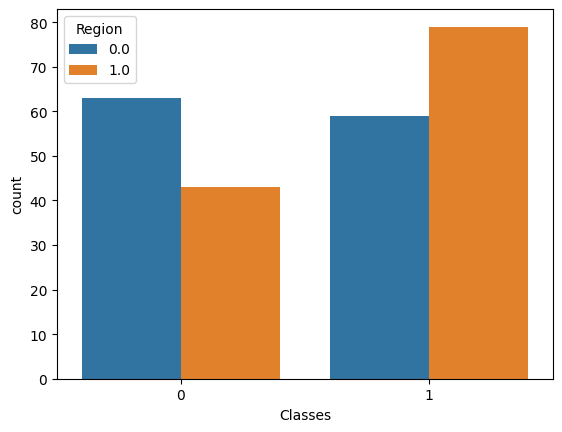

In [31]:
sns.countplot(data=df,x='Classes',hue='Region')

# Observation
In Sidi Bel-abbes region occurence of fire is more than Bajaia region.

In [32]:
# Fetching list of numerical feature
num_features = [i for i in df.columns if df[i].dtype != 'O']
num_features

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'Classes',
 'Region']

In [33]:
# Fetching unique values
df[num_features].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
Region           2
dtype: int64

# Observation
1. Highly correlative: DMC-BUI,DC-BUI,ISI-FWI.
2. correlative: FFMC-ISI,FWI-DC,DC-DMC,FWI-BUI,FWI-DMC.

Note: Features with very high and high correlation are more linearly dependent and hence have almost the same effect on the dependent variable.So,we can drop one of the two features.

# Seggregating Discreate and Continuous variables

# Discreate Numerical Features

In [34]:
df.columns


Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [35]:
# The assumption to consider a feature discrete is that it should have less than 35 unique values otherwise it will be considered continuous feature.

discrete_feature = [i for i in num_features if len(df[i].unique())<35]
discrete_feature

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'Region']

# Discrete Numerical Feature vs Target Feature

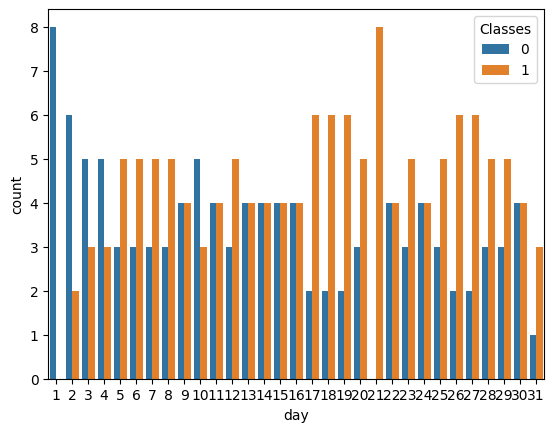

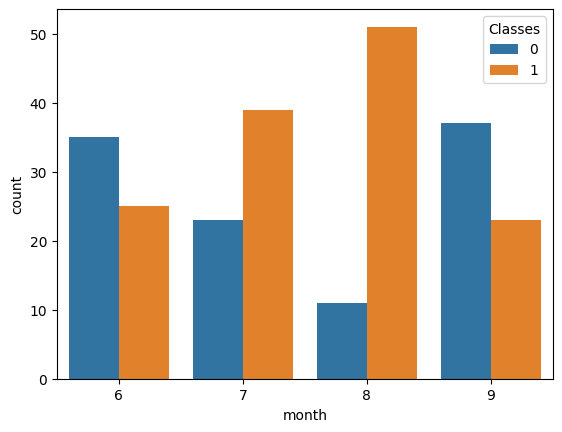

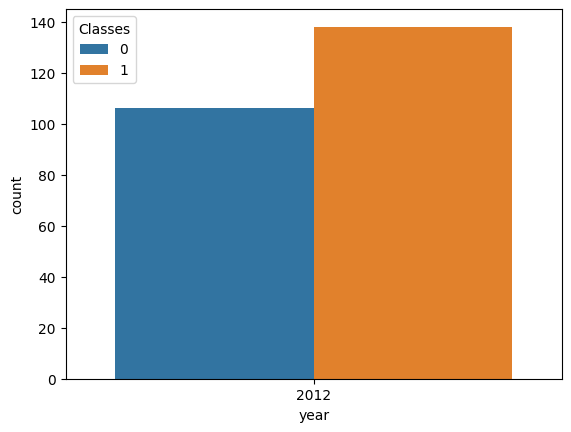

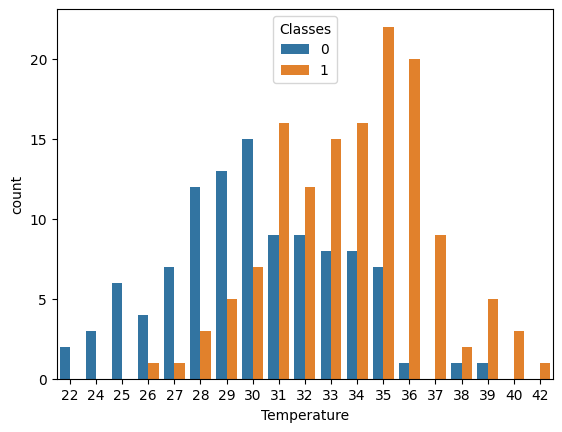

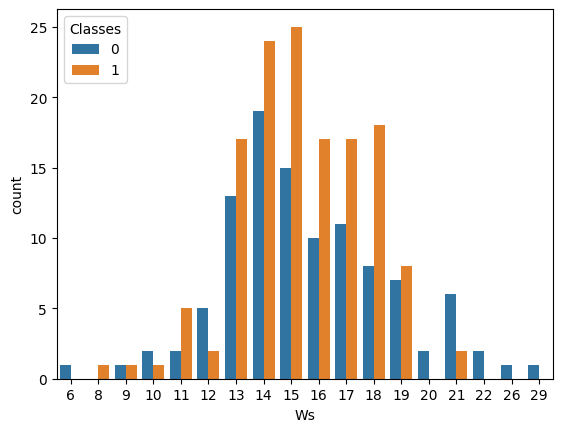

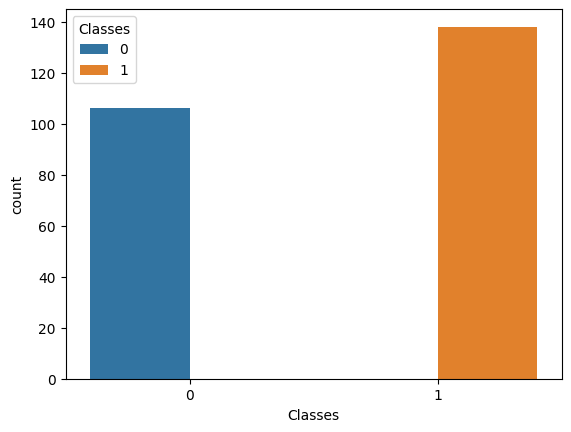

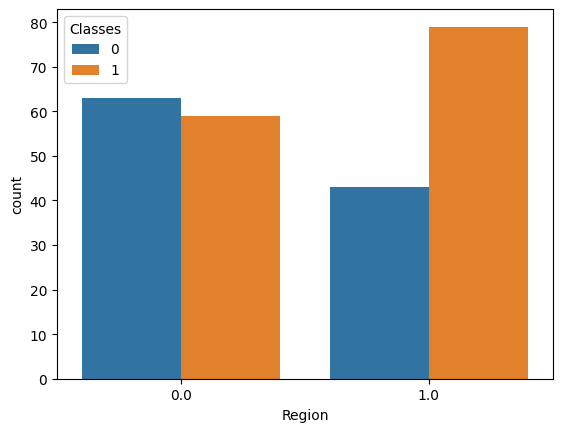

In [36]:
# This is bivaariate analysis between target and discrete numerical features

for i in discrete_feature:
    sns.countplot(data=df,x=i,hue='Classes')
    plt.show()

# Observation
1. In day vs classes, the occurence of fire is more than no fire.
2. In month vs classes, in the month of july and august fire cases are high.
3. Highest fire cases are in august month.
4. In temprature vs classes from 31 to 36 degree celcius no of fire cases are high.
5. In windspeed vs classes it is clearly visible that from 13-18 km/hr range there is most no of fire occurences.
6. In region vs classes, sedi bel-abbes region the no of fire cases are more than bajaia region.
7. final conclusion is that Fire occurences are more than no fire occurence.

# Continuous Numerical Feature

In [37]:
continuous_feature = [i for i in num_features if i not in discrete_feature]
continuous_feature

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Distribution of continuous Numerical Feature

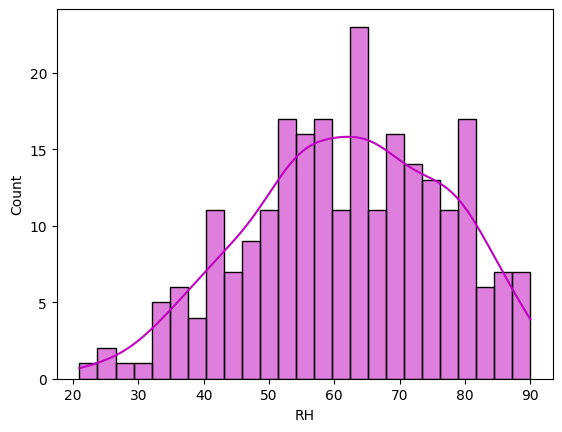

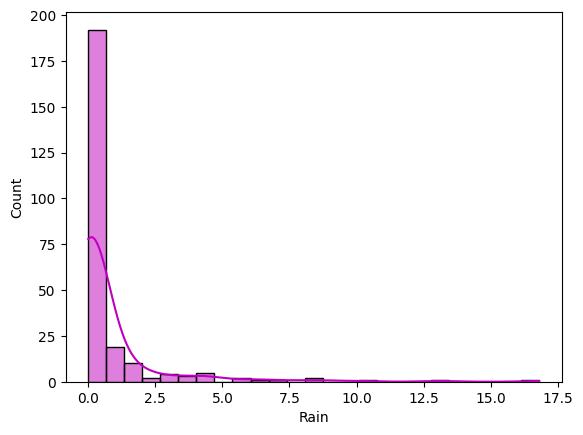

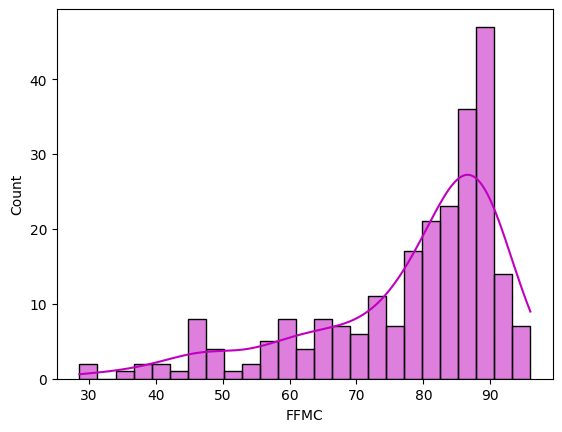

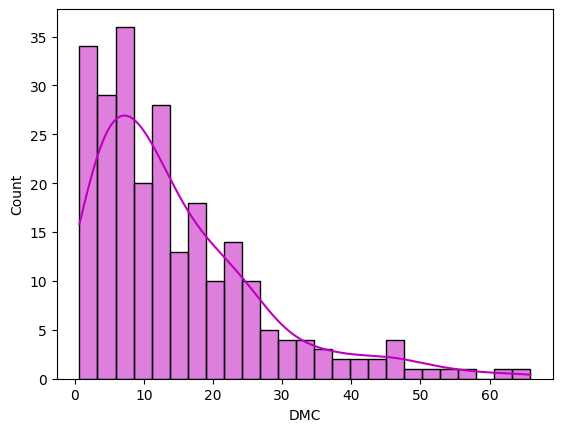

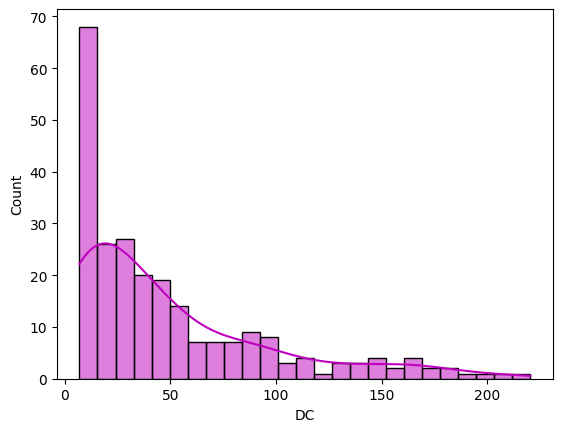

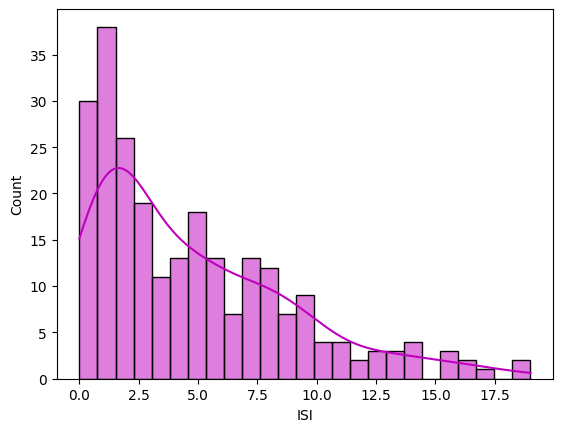

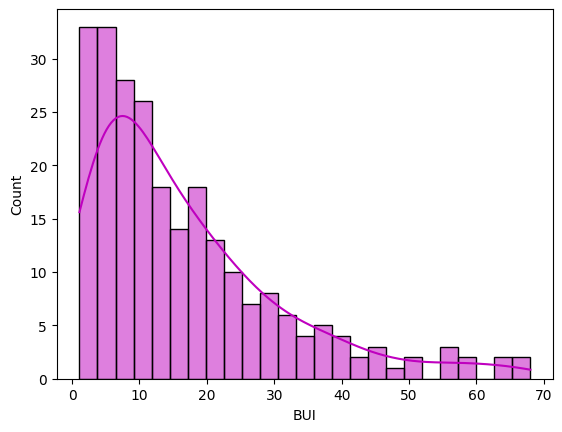

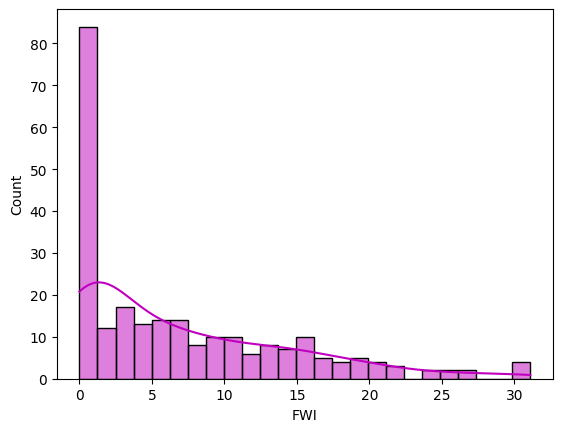

In [38]:
for i in continuous_feature:
    sns.histplot(data=df,x=i,kde=True,bins=25,color='m')
    plt.show()

# Observation
1. Relative humidity is following Gaussian Distribution.
2. Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution.
3. FFMC is following left skewed distribution.

In [39]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Checking for Outliers

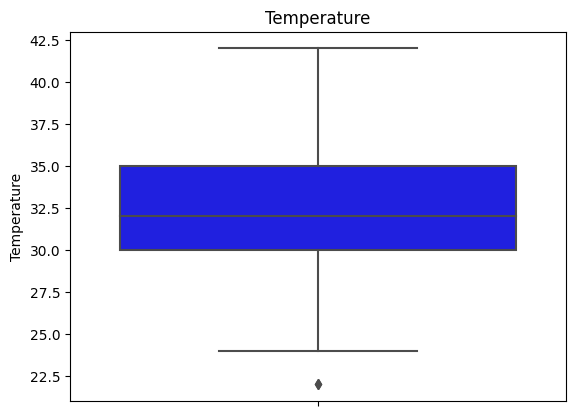

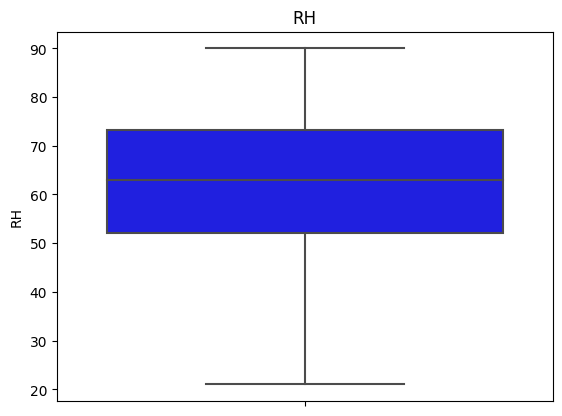

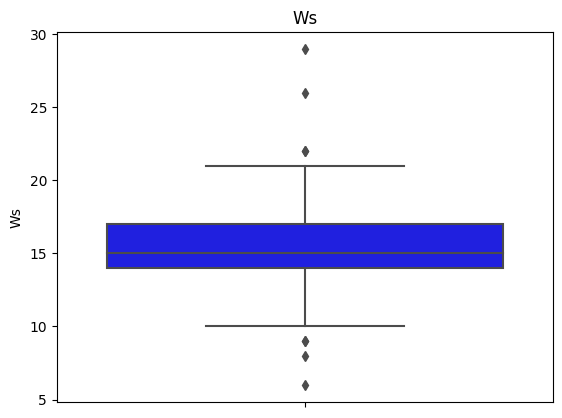

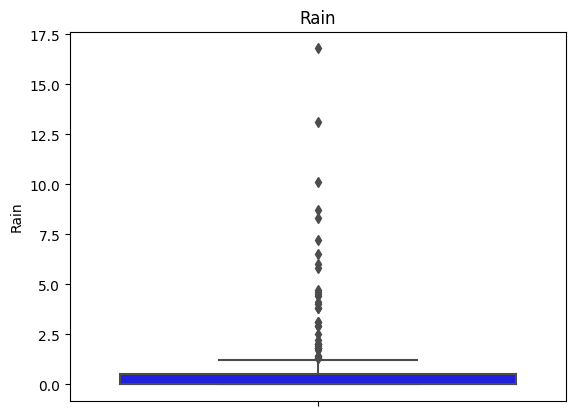

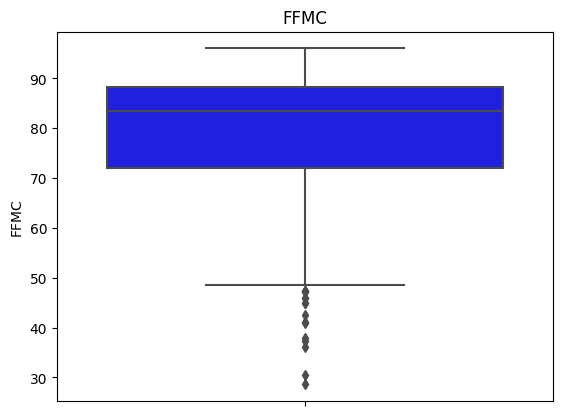

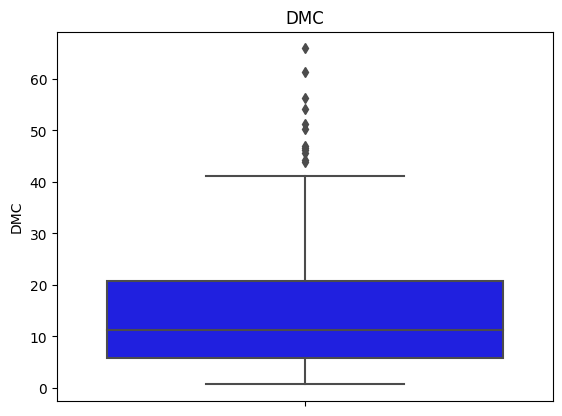

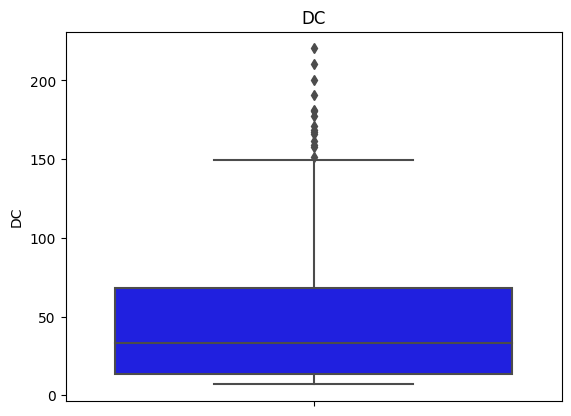

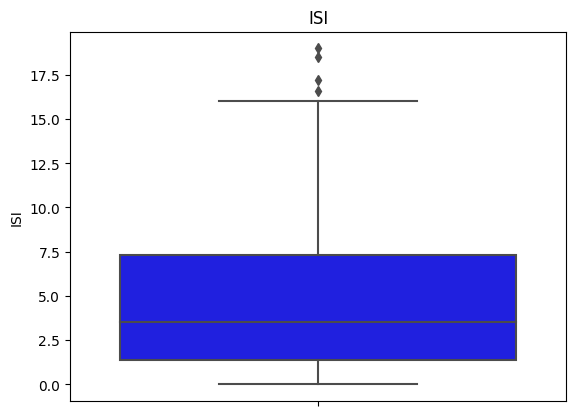

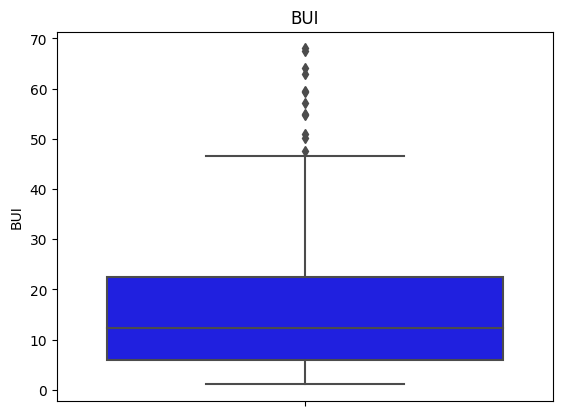

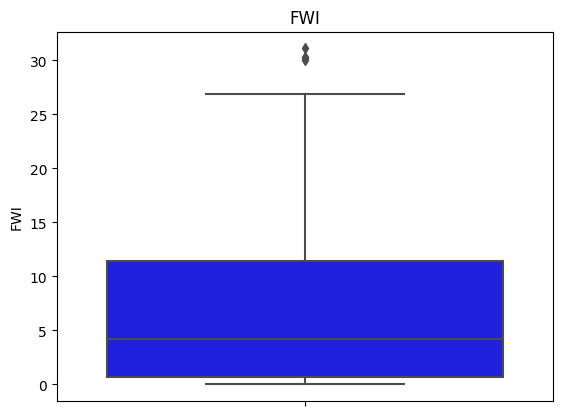

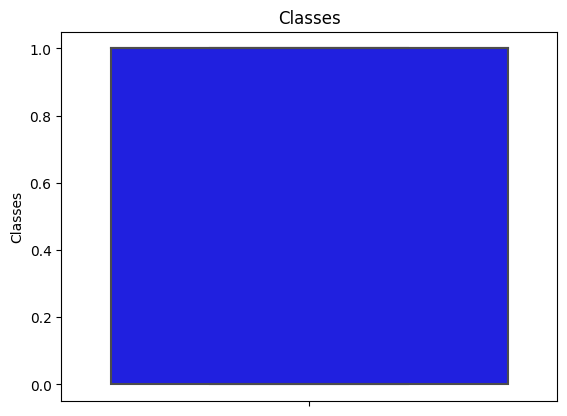

In [40]:
# Excluding day,month,year,region

for i in [i for i in num_features if i not in['day','month','year','Region']]:
    sns.boxplot(data=df,y=i,color='b')
    plt.title(i)
    plt.show()

# Observation
1. RH doesn't have outliers.
2. Temprature and FFMC have lower side outliers.
3. WS have outliers in both the sides.
4. Rain,DMC,DC,ISI,BUI and FWI have outliers in upper side.

# Correlation between each Numerical Features

In [41]:
df_corr = round(df[[i for i in num_features if i not in ['day','month','year','Region']]].corr(),2)
df_corr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


# Heatmap to visualise the correlation

<AxesSubplot:>

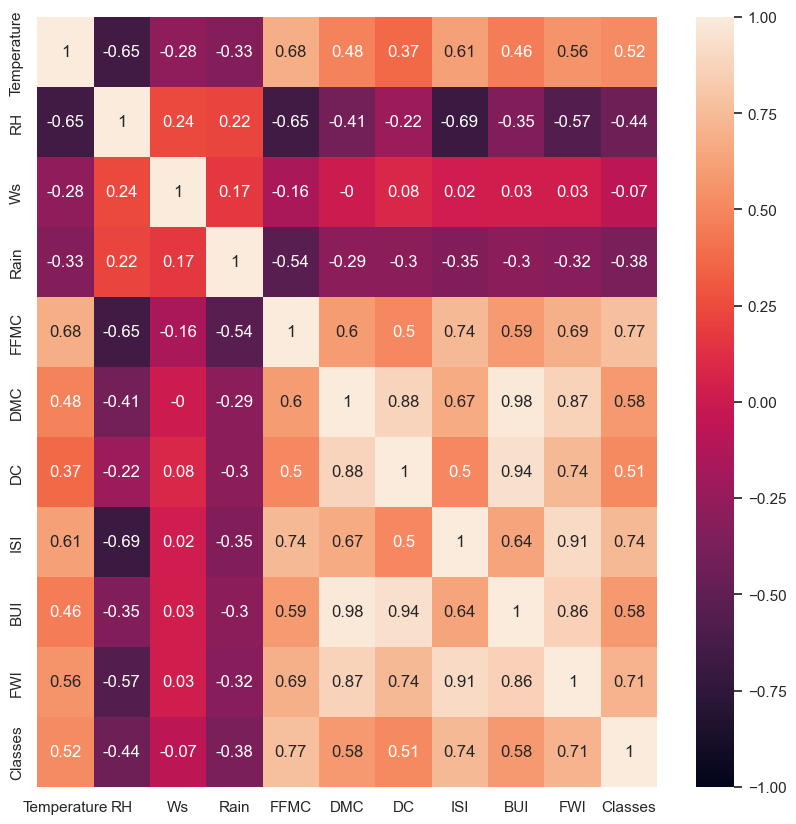

In [42]:
#Plotting heatmap for visualising the correlation between features
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(data=df_corr,annot=True,vmin=-1,vmax=1)

# Feature vs Target

# Day

<AxesSubplot:xlabel='day', ylabel='Temperature'>

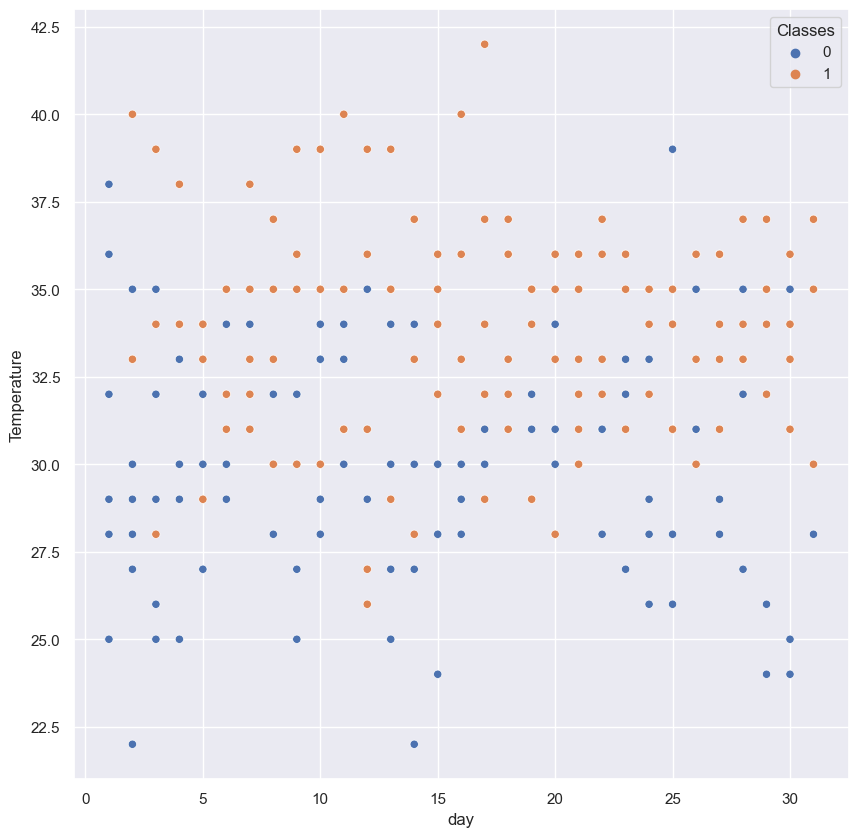

In [43]:
sns.scatterplot(data=df,x='day',y='Temperature',hue='Classes')

# Observation
Most cases of fire occure for temperature more than 30 degree celcius.

# Month

<AxesSubplot:xlabel='month', ylabel='Temperature'>

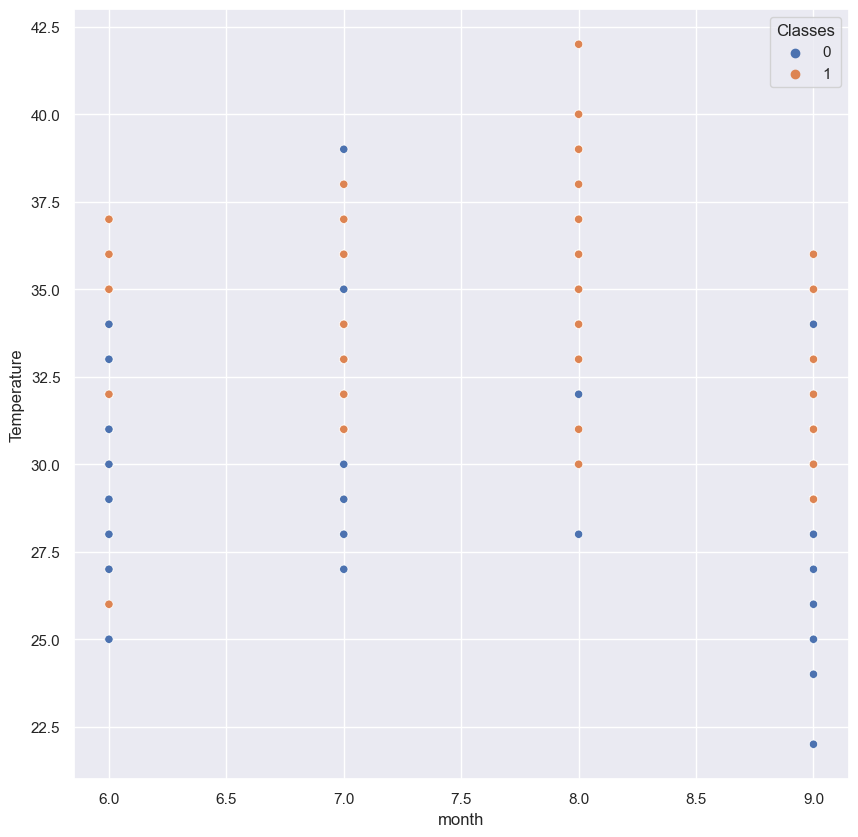

In [44]:
sns.scatterplot(data=df,x='month',y='Temperature',hue='Classes')

# Observation
Most no of fire cases are occured in august and least no of fire cases are occured in september.

# Region

<AxesSubplot:xlabel='Region', ylabel='Temperature'>

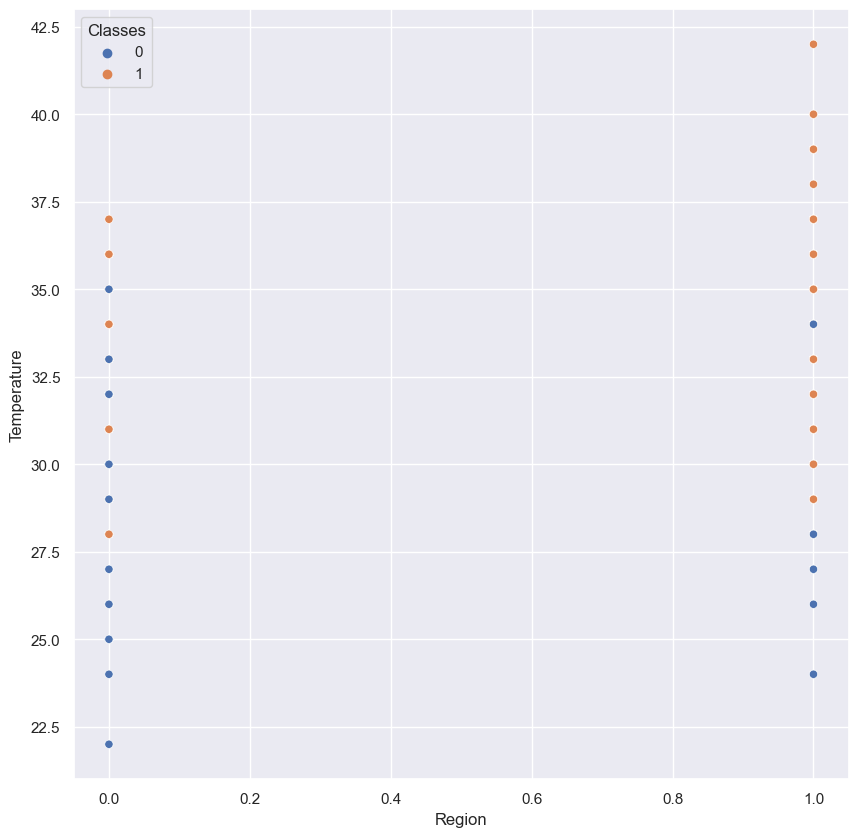

In [45]:
sns.scatterplot(data=df,x='Region',y='Temperature',hue='Classes')

# Observation
1. In Bejaia region, no of fire cases are less as compared to Sidi Bel-abbes region.

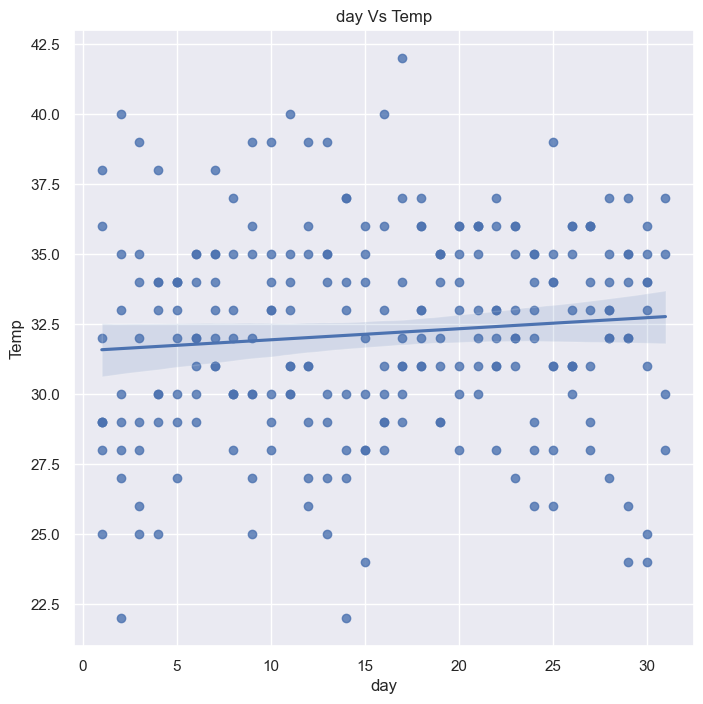

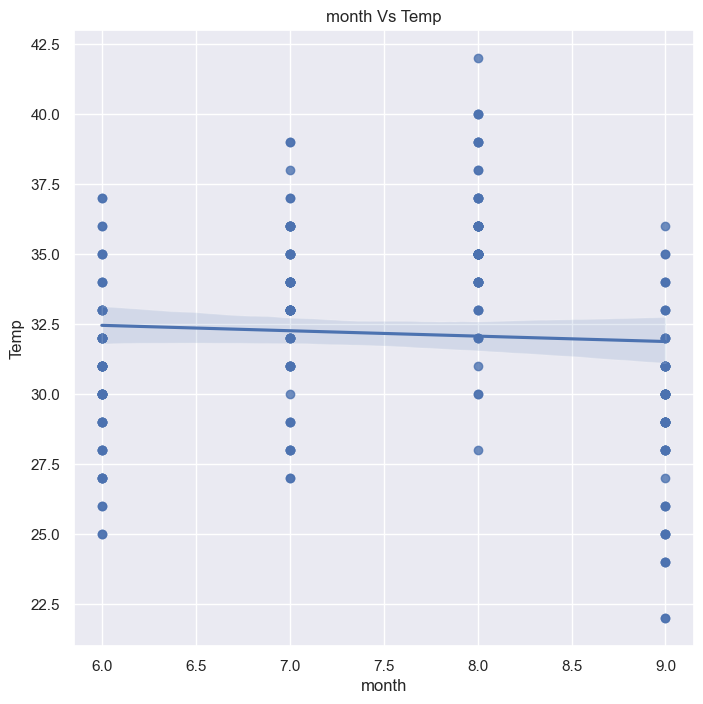

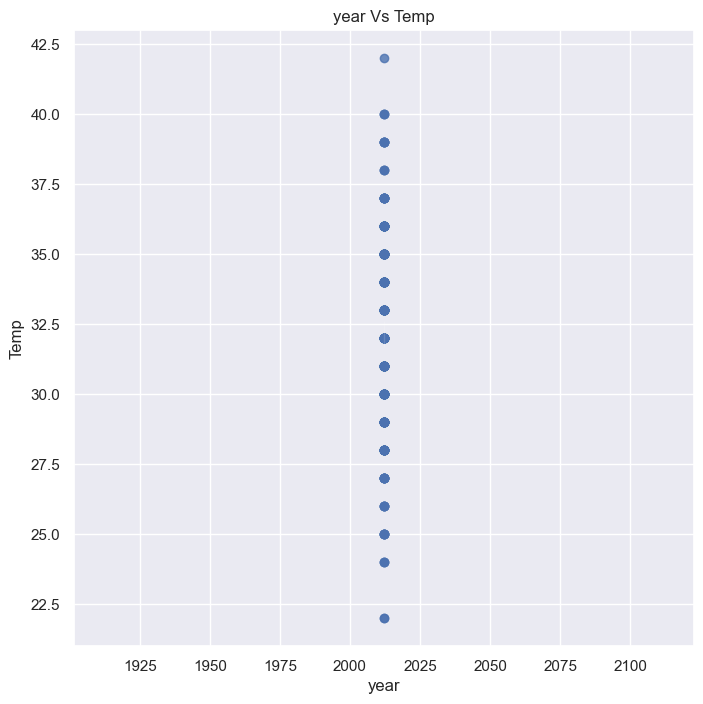

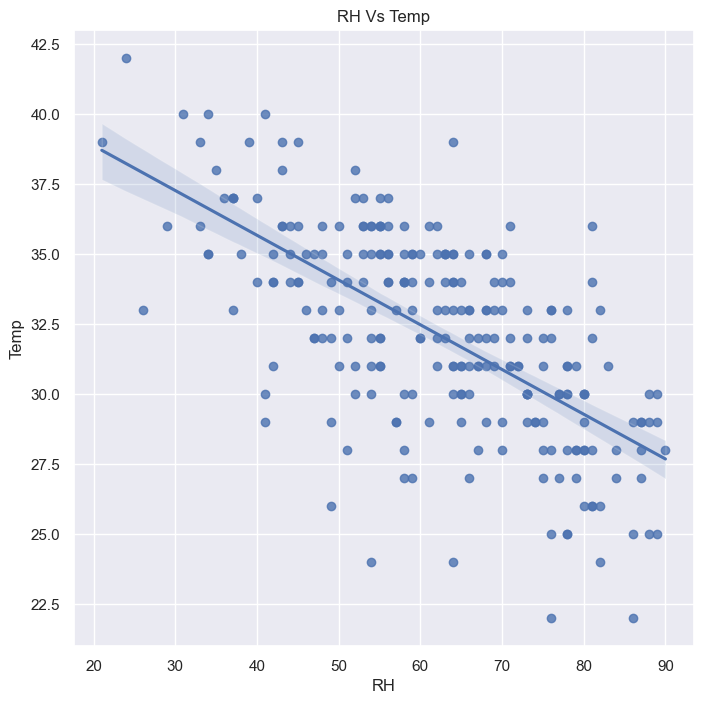

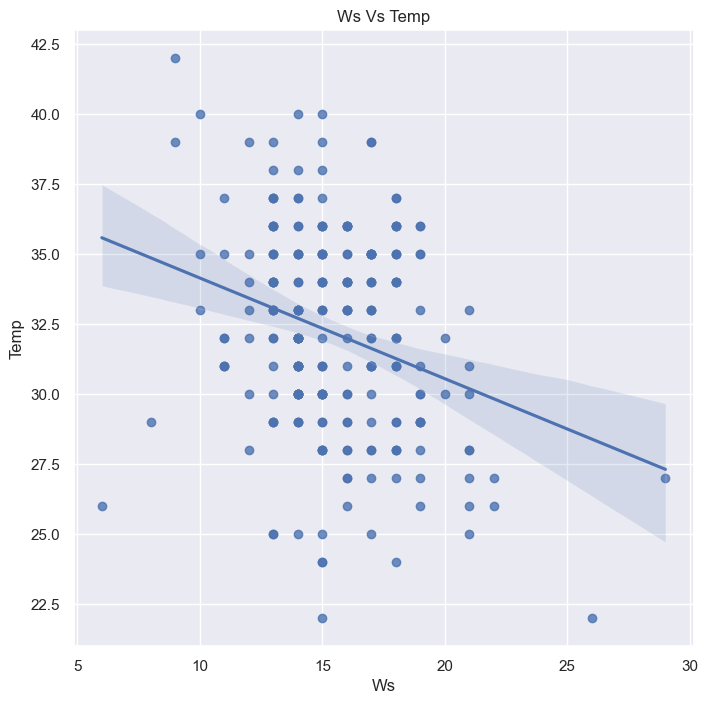

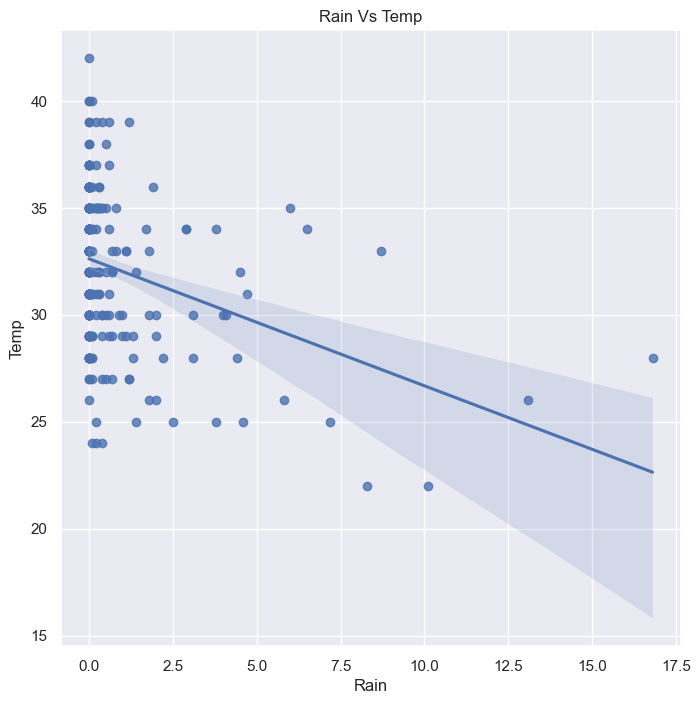

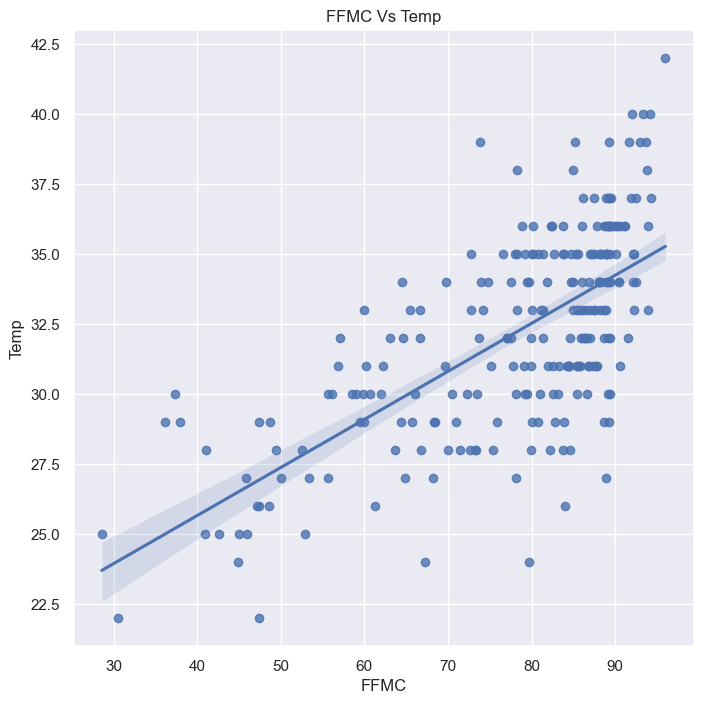

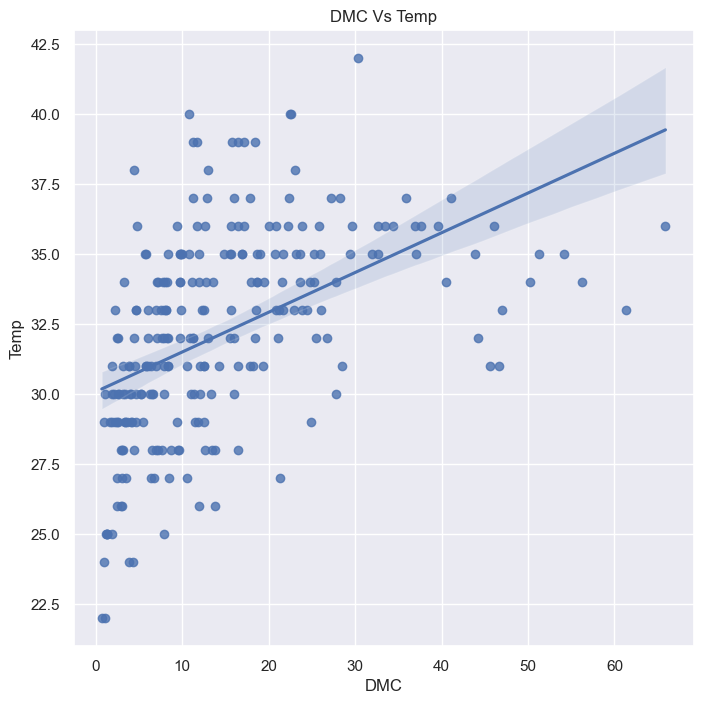

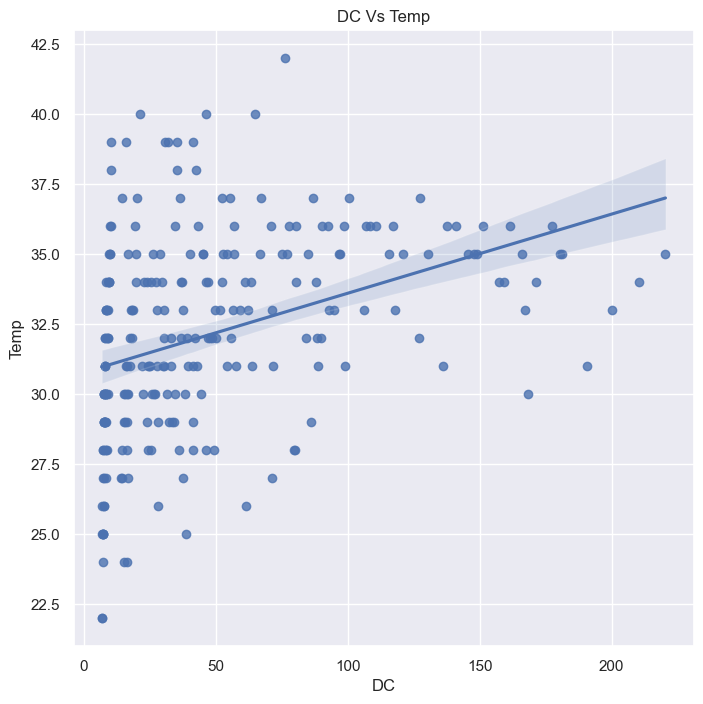

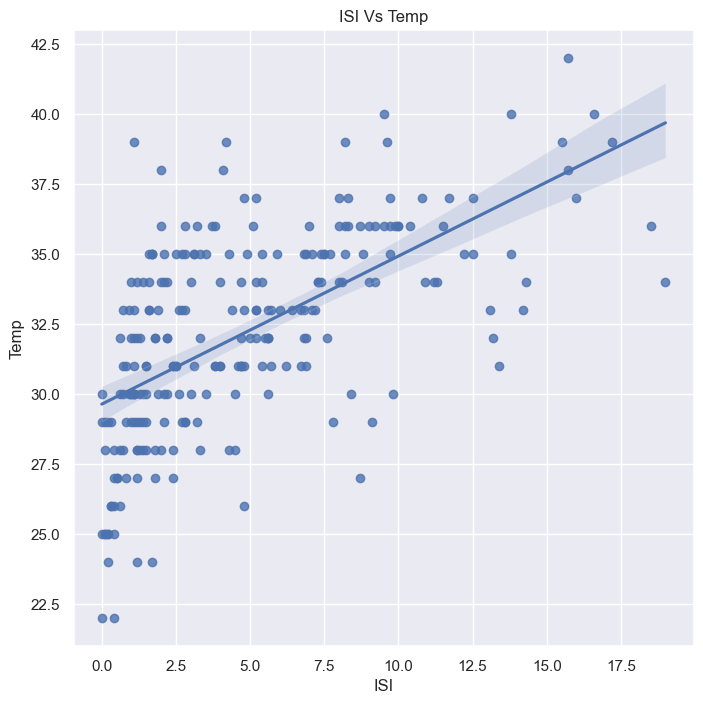

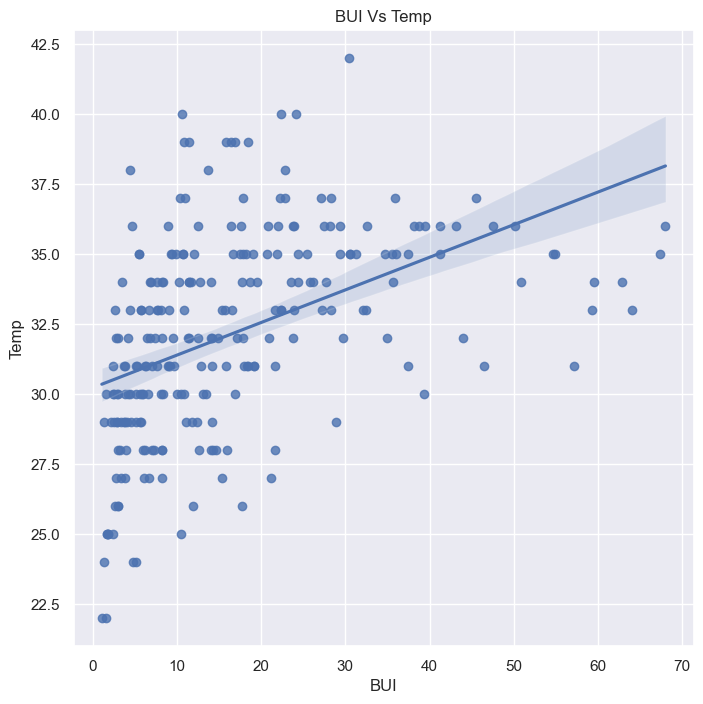

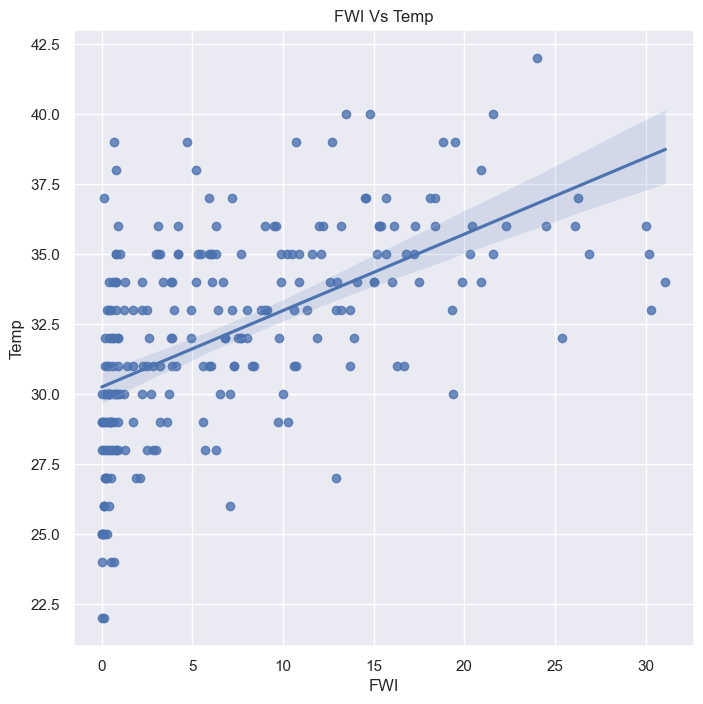

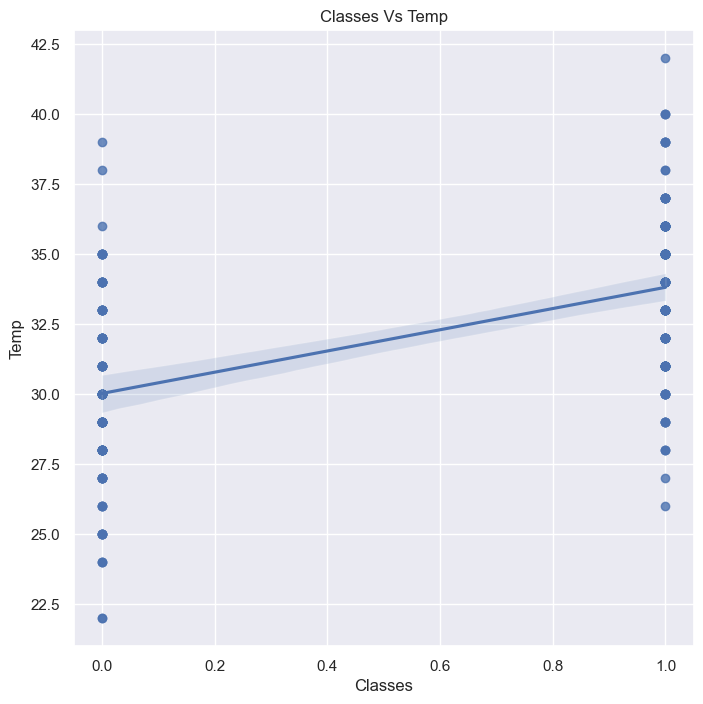

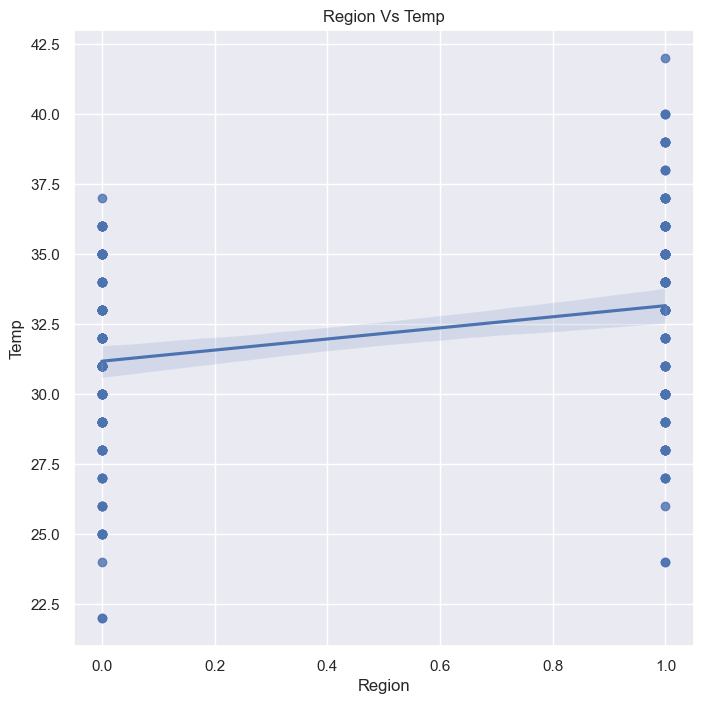

In [46]:
# Shaded region, with respect to Ridge and Lasso(Lambda)

for i in [i for i in df.columns if i not in ['Temperature']]:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[i],y=df['Temperature'])
    plt.xlabel(i)
    plt.ylabel("Temp")
    plt.title('{} Vs Temp'.format(i))
    plt.show()

# Final Report
1. There is no null values in the dataset.
2. Highly correlative: DMC-BUI,DC-BUI,ISI-FWI.
3. correlative: FFMC-ISI,FWI-DC,DC-DMC,FWI-BUI,FWI-DMC.
4. Relative humidity is following Gaussian Distribution.
5. Rain,DMC,DC,ISI,BUI,FWI are following right skewed distribution.
6. FFMC is following left skewed distribution.
7. In day vs classes, the occurence of fire is more than no fire.
8. In month vs classes, in the month of july and august fire cases are high.
9. Highest fire cases are in august month.
10. In temprature vs classes from 31 to 36 degree celcius no of fire cases are high.
11. In windspeed vs classes it is clearly visible that from 13-18 km/hr range there is most no of fire occurences.
12. In region vs classes, sedi bel-abbes region the no of fire cases are more than bajaia region.
13. final conclusion is that Fire occurences are more than no fire occurence.

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

# Seperating Dependent and Independent Features

In [48]:
df.drop('year',axis=1,inplace=True)

In [49]:
df['Temp']=df['Temperature']

In [50]:
df.drop('Temperature',axis=1,inplace=True)

# Model Building Preperation

# Getting Independent features in dataset and dependent features in series

In [51]:
# X independent features and Y dependent feature

X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [52]:
X.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,2,6,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,3,6,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,4,6,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,5,6,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0


In [53]:
Y.head()

0    29
1    29
2    26
3    25
4    27
Name: Temp, dtype: int64

# Splitting data into Training and Test data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# Random state train test split will be same with all people using random_state=42
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=42)

In [56]:
X_train.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
114,23,9,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7,0,0.0
65,5,8,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1,1,0.0
132,11,6,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7,1,1.0
207,25,8,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1,1,1.0
162,11,7,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8,0,1.0


In [57]:
Y_train.head()

114    32
65     34
132    31
207    34
162    34
Name: Temp, dtype: int64

In [58]:
X_test.head()

,day,month,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
24,25,6,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1,0.0
6,7,6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0.0
153,2,7,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1,1.0
211,29,8,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1,1.0
198,16,8,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1,1.0


In [59]:
Y_test.head()

24     31
6      33
153    33
211    35
198    40
Name: Temp, dtype: int64

In [60]:
# shape of X_train and Y_train
X_train.shape, Y_train.shape

((163, 13), (163,))

# Feature Engineering

# Standardization/Feature Scaling the dataset

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler=StandardScaler()
scaler

StandardScaler()

In [63]:
# Using fit_transform to standardise train data
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.84447703,  1.3826723 , -0.60257784, ..., -0.8196431 ,
        -1.04390785, -0.99388373],
       [-1.19310159,  0.48116996,  0.14460201, ..., -0.08219052,
         0.95793896, -0.99388373],
       [-0.51390872, -1.32183472, -1.41768313, ...,  1.36540157,
         0.95793896,  1.0061539 ],
       ...,
       [-1.64589683,  1.3826723 ,  0.89178186, ..., -0.90158227,
        -1.04390785, -0.99388373],
       [ 1.41047108, -0.42033238, -0.39880152, ...,  0.31384882,
         0.95793896,  1.0061539 ],
       [-0.51390872,  1.3826723 ,  0.9597073 , ..., -0.87426921,
        -1.04390785, -0.99388373]])

# To avoid data leakage here we are using only Transform
# Training mean and training std will be used for standardisation of test when we use transform on test data

In [64]:
X_test=scaler.transform(X_test)
X_test

array([[ 1.07087465, -1.32183472,  0.07667657, ...,  0.23190965,
         0.95793896, -0.99388373],
       [-0.96670396, -1.32183472, -0.60257784, ...,  0.0680313 ,
         0.95793896, -0.99388373],
       [-1.53269802, -0.42033238, -1.01013048, ..., -0.04122093,
         0.95793896,  1.0061539 ],
       ...,
       [ 1.29727227, -0.42033238, -1.01013048, ...,  1.17421016,
         0.95793896, -0.99388373],
       [-1.3063004 , -1.32183472,  0.07667657, ..., -0.77867351,
        -1.04390785,  1.0061539 ],
       [ 1.29727227, -1.32183472, -0.5346524 , ...,  0.7235447 ,
         0.95793896,  1.0061539 ]])

# Model Building


# Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
linear_reg = LinearRegression()

In [67]:
linear_reg

LinearRegression()

In [68]:
# Passing training data to the model
linear_reg.fit(X_train,Y_train)

LinearRegression()

In [69]:
# Printing co-efficient and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(linear_reg.coef_))
print("Intercept of best fit hyperplane is {}".format(linear_reg.intercept_))

Co-efficients of independent features is [-0.62994684 -0.33080692 -0.9681523  -0.55769053  0.23645285  1.90585623
  0.93380592  1.17296981  0.044581   -1.35995788  0.19772494 -0.25230922
  0.08345626]
Intercept of best fit hyperplane is 31.98159509202454


# Using model to get predictions of test data

In [71]:
linear_reg_pred = linear_reg.predict(X_test)

In [72]:
linear_reg_pred

array([32.86982262, 34.97907511, 34.71895423, 32.93220734, 36.64866482,
       32.00281859, 35.27819508, 28.49312857, 31.84450923, 29.27704091,
       29.06704133, 33.07364481, 32.4667427 , 32.7008168 , 34.32599535,
       31.80453584, 37.01042617, 25.23211237, 32.73196597, 33.38253854,
       31.55571716, 28.30699286, 34.23615097, 29.30603632, 36.93126913,
       24.98756128, 33.51228222, 33.57587507, 33.35705604, 35.40329932,
       33.767112  , 31.85221582, 32.40507656, 33.11736397, 32.44972087,
       31.46599605, 30.34784931, 34.2239929 , 32.37589956, 21.74277219,
       33.82900884, 34.85103093, 31.20651563, 24.69868309, 36.17424894,
       32.81796744, 31.22635993, 30.67357508, 35.1950892 , 34.29311524,
       36.98975313, 30.97884914, 30.95678802, 34.6655222 , 33.46814569,
       32.38222097, 36.65227179, 30.589826  , 30.97603618, 36.10290928,
       33.94615809, 28.43783118, 33.17776773, 31.78923636, 31.99593987,
       24.12810241, 33.39123143, 29.76320324, 36.80847578, 34.30

# Validating model using assumptions of Linear Regression

# Linear Relationship
1. Test truth data and Predicted data should follow linear relationship.
2. This is an indication of a good model.

Text(0, 0.5, 'Predicted Data')

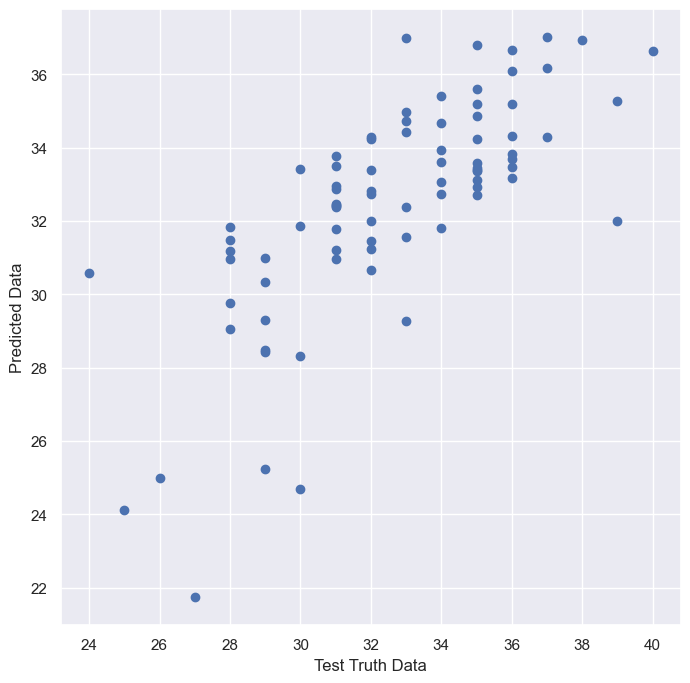

In [73]:
plt.scatter(x=Y_test,y=linear_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

# Residual Distribution
1. Residuals should follow normal distribution.
2. If residuals follow normal distribution, it indicated we have a good model.

In [75]:
residual_linear_reg = Y_test-linear_reg_pred
residual_linear_reg

24    -1.869823
6     -1.979075
153   -1.718954
211    2.067793
198    3.351335
         ...   
180    1.274202
5     -1.960397
56     0.798390
125   -3.430249
148    2.306835
Name: Temp, Length: 81, dtype: float64

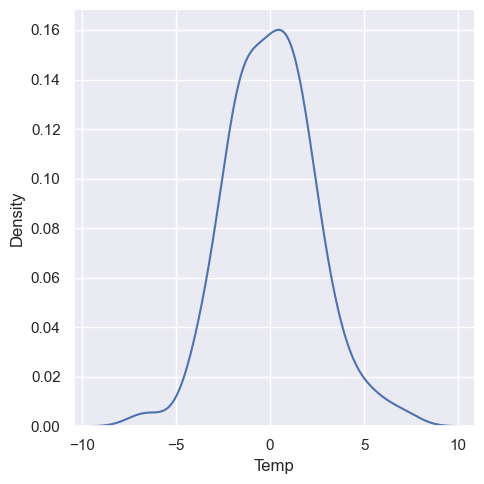

In [76]:
sns.displot(x=residual_linear_reg,kind='kde')

# Uniform Distribution
1. Residual vs Predictions should follow a uniform distribution.
2. If Residual vs Predictions follow uniform distribution, it indicates we have a good model.

Text(0, 0.5, 'Residual')

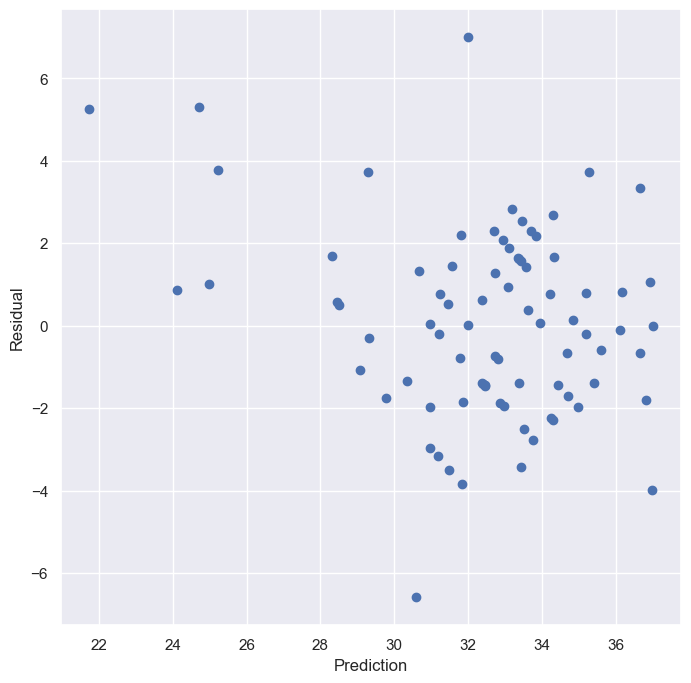

In [77]:
plt.scatter(x=linear_reg_pred,y=residual_linear_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')

# Performance Matrix

# Cost function values

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# MAE,MSE,RMSE

In [79]:
print("Mean squared error is {}".format(round(mean_squared_error(Y_test,linear_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test,linear_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test,linear_reg_pred)),2)))

Mean squared error is 5.25
Mean absolute error is 1.81
Root Mean squared error is 2.29


# R Square and Adjusted R Square values

In [80]:
from sklearn.metrics import r2_score

In [82]:
linear_reg_r2_score = r2_score(Y_test,linear_reg_pred)
print("Linear regression model has {} % accuracy".format(round(linear_reg_r2_score*100,3)))

linear_reg_r2_score = 1-((1-linear_reg_r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("Adjusted R Square accuracy is {} %".format(round(linear_reg_r2_score*100,2)))

Linear regression model has 51.089 % accuracy
Adjusted R Square accuracy is 41.6 %


# Ridge Regression

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge_reg = Ridge()
ridge_reg

Ridge()

In [85]:
# Passing tarining data to the model
ridge_reg.fit(X_train,Y_train)

Ridge()

In [86]:
# Printing co-efficient and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(ridge_reg.coef_))
print("Intercept of best fit hyperplane is {}".format(ridge_reg.intercept_))

Co-efficients of independent features is [-0.61752995 -0.3207458  -0.98218457 -0.55467826  0.21315492  1.84131702
  0.40094067  0.87094221  0.11396182 -0.48465778  0.08466793 -0.24063909
  0.09187935]
Intercept of best fit hyperplane is 31.98159509202454


# Using model to get predictions of test data

In [91]:
ridge_reg_pred = ridge_reg.predict(X_test)
ridge_reg_pred

array([32.85982748, 34.9149207 , 34.6801255 , 32.92998132, 36.61056862,
       32.05917754, 35.25499575, 28.51988807, 31.83679288, 29.28276684,
       29.06439442, 33.15037313, 32.44677748, 32.7322483 , 34.35814975,
       31.78754571, 36.91567124, 25.31324295, 32.67492302, 33.35526777,
       31.49765658, 28.29644553, 34.22316335, 29.30830796, 36.93224783,
       25.06526261, 33.48461631, 33.57641555, 33.35387649, 35.32860357,
       33.76792408, 31.83362797, 32.37993338, 33.16010038, 32.42109455,
       31.5078178 , 30.28919718, 34.25440049, 32.3007279 , 21.86171205,
       33.83192673, 34.81983629, 31.24261825, 24.76831106, 36.10419592,
       32.77320818, 31.21807666, 30.69260083, 35.1742616 , 34.29037291,
       36.93483074, 30.9447582 , 30.97755205, 34.71719979, 33.43904851,
       32.52070875, 36.64973602, 30.62216011, 30.9696123 , 36.10416977,
       33.88939183, 28.47020463, 33.13493675, 31.7769902 , 32.00695307,
       24.17731957, 33.37004249, 29.76297127, 36.78001537, 34.44

# Validation model using assumptions of Ridge regression

# Linear relationship
1. Test truth data and predicted data should follow linear relationship.
2. This is indication of a good model.

Text(0, 0.5, 'Predicted Data')

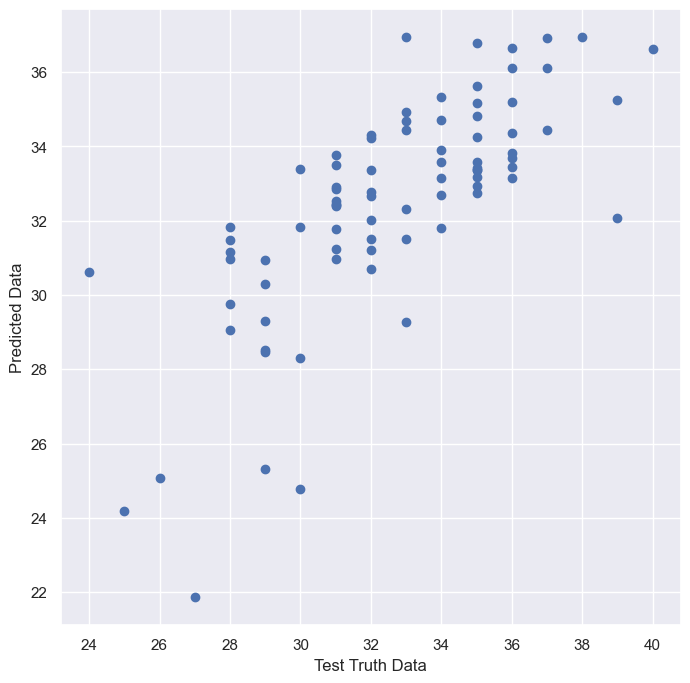

In [92]:
plt.scatter(x=Y_test,y=ridge_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

# Residual Distribution


In [94]:
residual_ridge_reg = Y_test-ridge_reg_pred
residual_ridge_reg.head()

24    -1.859827
6     -1.914921
153   -1.680125
211    2.070019
198    3.389431
Name: Temp, dtype: float64

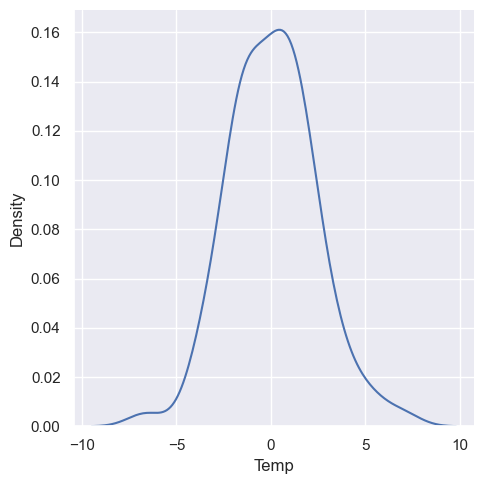

In [95]:
sns.displot(x=residual_ridge_reg,kind='kde')

# Uniform Distribution

Text(0, 0.5, 'Residuals')

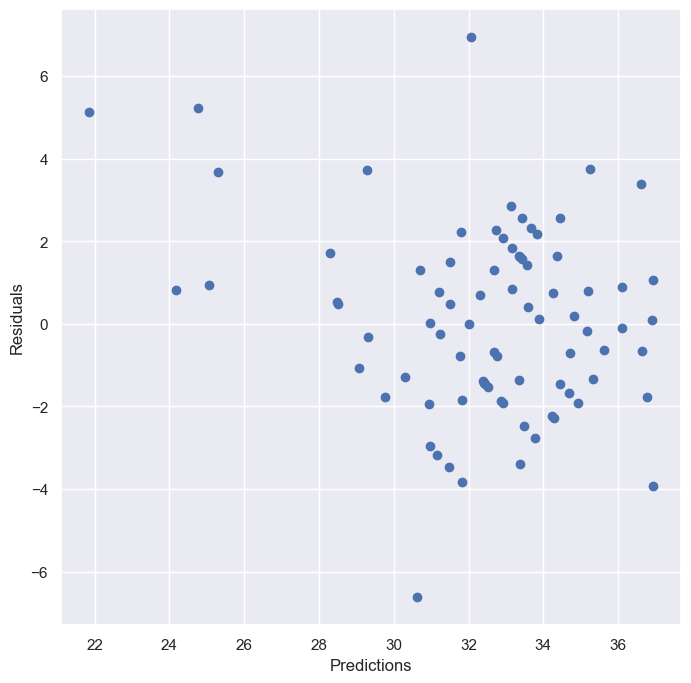

In [96]:
plt.scatter(x=ridge_reg_pred,y=residual_ridge_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Performance Matrix

# Cost function values

# MAE,MSE,RMSE

In [97]:
print("Mean squared error is {}".format(round(mean_squared_error(Y_test,ridge_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test,ridge_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test,ridge_reg_pred)),2)))

Mean squared error is 5.19
Mean absolute error is 1.8
Root Mean squared error is 2.28


# R Squared and Adjusted R Square values

In [120]:
ridge_reg_r2_score = r2_score(Y_test,ridge_reg_pred)
print("Ridge regression model has {} % accuracy".format(round(ridge_reg_r2_score*100,3)))

ridge_reg_r2_score = 1-((1-ridge_reg_r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("Adjusted R Square accuracy is {} %".format(round(ridge_reg_r2_score*100,2)))

Ridge regression model has 51.709 % accuracy
Adjusted R Square accuracy is 42.34 %


# Lasso Regression

In [101]:
from sklearn.linear_model import Lasso

In [102]:
lasso_reg = Lasso()

In [103]:
lasso_reg

Lasso()

In [104]:
lasso_reg.fit(X_train,Y_train)

Lasso()

In [105]:
# Printing co-efficient and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("Intercept of best fit hyperplane is {}".format(lasso_reg.intercept_))

Co-efficients of independent features is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
Intercept of best fit hyperplane is 31.98159509202454


# Using model to get Predictions of test data

In [107]:
lasso_reg_pred = lasso_reg.predict(X_test)
lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

# Validating model using assumptions of Lasso Regression

Text(0, 0.5, 'Predicted Data')

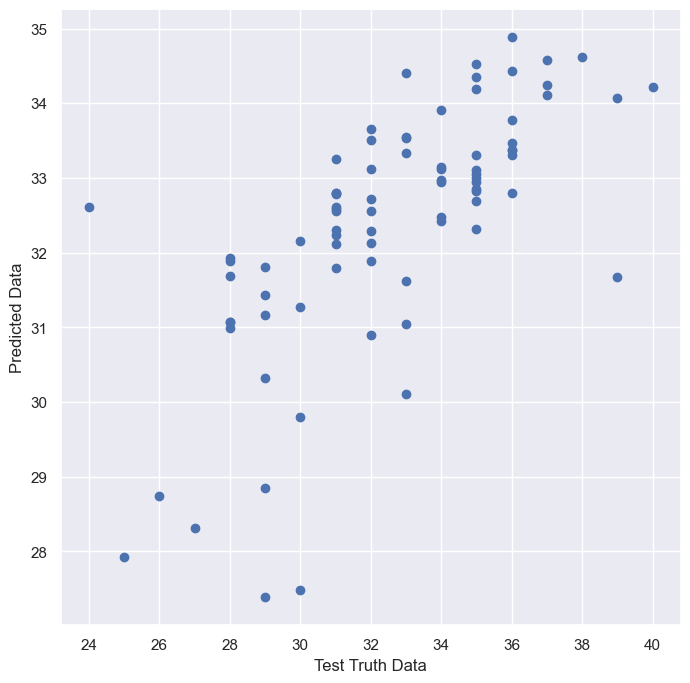

In [109]:
plt.scatter(x=Y_test,y=lasso_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Predicted Data")

# Residual Distribution

In [111]:
residual_lasso_reg = Y_test-lasso_reg_pred
residual_lasso_reg.head()

24    -1.783811
6     -0.335821
153   -0.538357
211    2.308080
198    5.787876
Name: Temp, dtype: float64

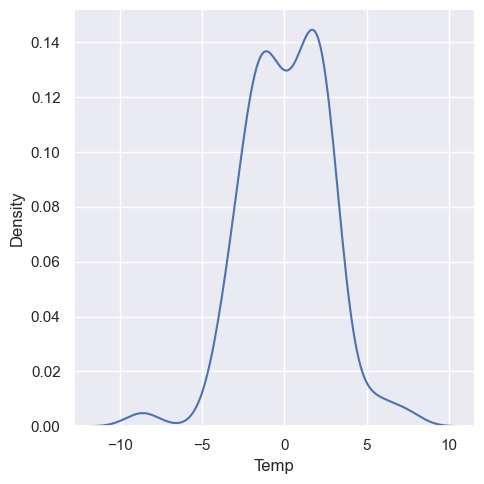

In [112]:
sns.displot(x=residual_lasso_reg,kind='kde')

# Uniform Distribution

Text(0, 0.5, 'Residuals')

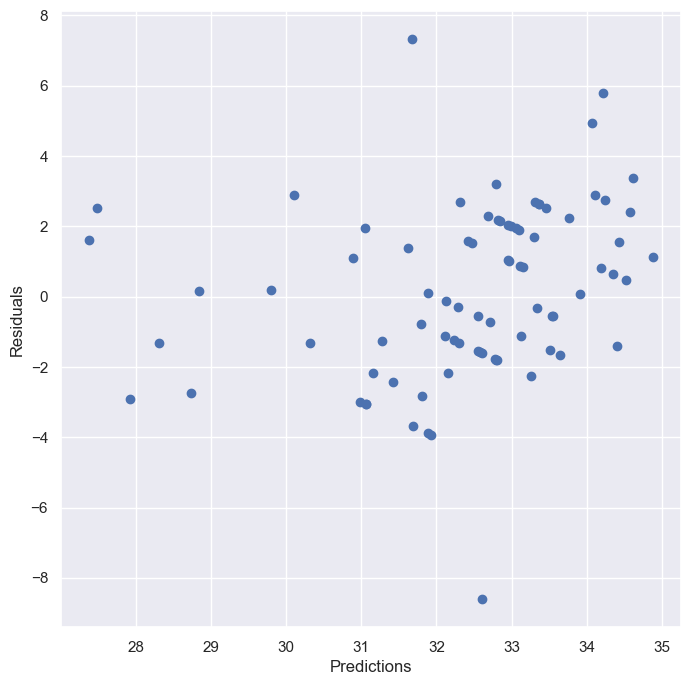

In [113]:
plt.scatter(x=lasso_reg_pred,y=residual_lasso_reg)
plt.xlabel('Predictions')
plt.ylabel('Residuals')

# Performance Matrix

# Cost function values

# MAE,MSE,RMSE

In [114]:
print("Mean squared error is {}".format(round(mean_squared_error(Y_test,lasso_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test,lasso_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test,lasso_reg_pred)),2)))

Mean squared error is 6.09
Mean absolute error is 2.0
Root Mean squared error is 2.47


# R Squared and Adjusted R Square values

In [118]:
lasso_reg_r2_score = r2_score(Y_test,lasso_reg_pred)
print("Lasso regression model has {} % accuracy".format(round(lasso_reg_r2_score*100,3)))

lasso_reg_r2_score = 1-((1-lasso_reg_r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("Adjusted R Square accuracy is {} %".format(round(lasso_reg_r2_score*100,2)))

Lasso regression model has 43.342 % accuracy
Adjusted R Square accuracy is 32.35 %


# Elastic-Net Regression

In [122]:
from sklearn.linear_model import ElasticNet

In [123]:
elastic_reg = ElasticNet()
elastic_reg

ElasticNet()

In [124]:
elastic_reg.fit(X_train,Y_train)

ElasticNet()

In [125]:
# Printing co-efficient and intercept of best fit hyperplane
print("Co-efficients of independent features is {}".format(lasso_reg.coef_))
print("Intercept of best fit hyperplane is {}".format(lasso_reg.intercept_))

Co-efficients of independent features is [-0.         -0.         -0.62324302 -0.         -0.          1.25581509
  0.          0.          0.          0.          0.          0.
  0.        ]
Intercept of best fit hyperplane is 31.98159509202454


# Using model to get predictions of test data

In [126]:
elastic_reg_pred = elastic_reg.predict(X_test)
elastic_reg_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.15

# Validating model using assumption of Elastic-Net regression

# Linear relationship

Text(0, 0.5, 'Predicted data')

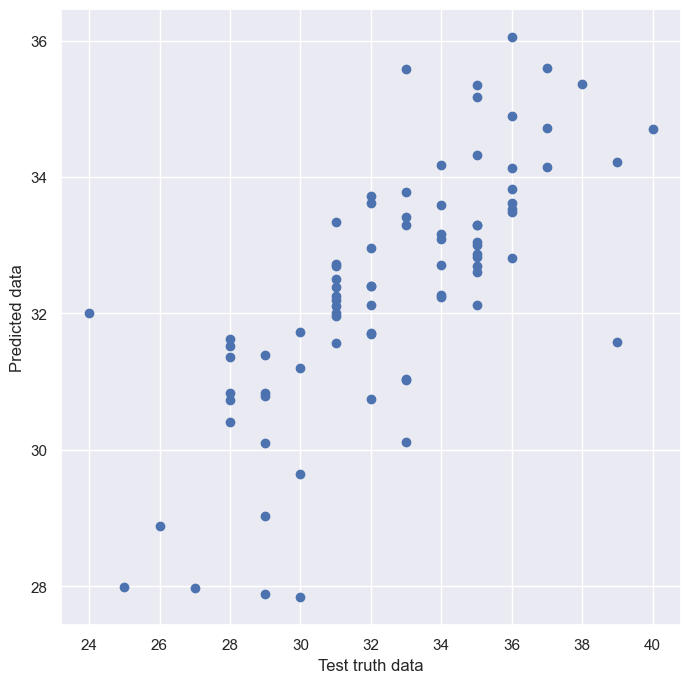

In [127]:
plt.scatter(x=Y_test,y=elastic_reg_pred)
plt.xlabel('Test truth data')
plt.ylabel('Predicted data')

# Residual Distribution

In [128]:
residual_elastic_reg = Y_test-elastic_reg_pred
residual_elastic_reg.head()

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
Name: Temp, dtype: float64

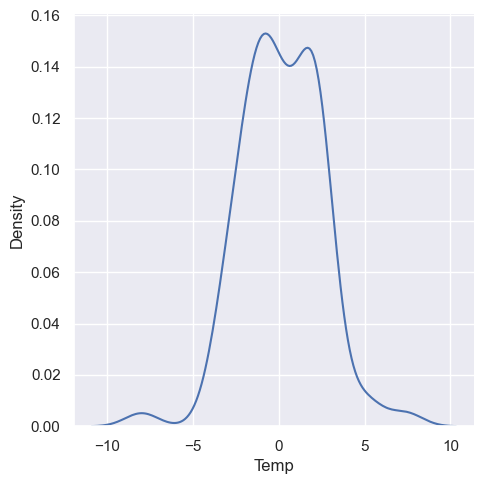

In [129]:
sns.displot(x=residual_elastic_reg,kind='kde')

# Uniform Distribution

Text(0, 0.5, 'Residual')

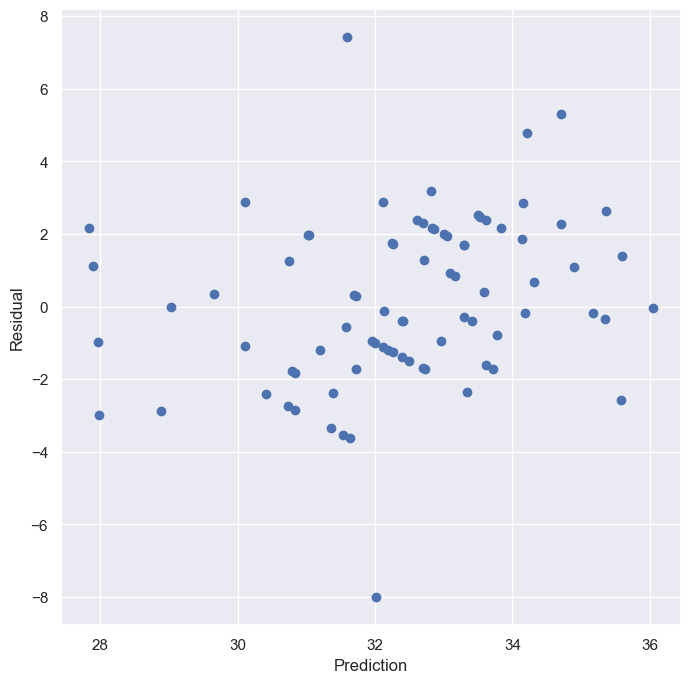

In [130]:
plt.scatter(x=elastic_reg_pred,y=residual_elastic_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')

# Performance Matrix

# Cost function values

# MSE,MAE and RMSE

In [131]:
print("Mean squared error is {}".format(round(mean_squared_error(Y_test,elastic_reg_pred),2)))
print("Mean absolute error is {}".format(round(mean_absolute_error(Y_test,elastic_reg_pred),2)))
print("Root Mean squared error is {}".format(round(np.sqrt(mean_squared_error(Y_test,elastic_reg_pred)),2)))

Mean squared error is 5.39
Mean absolute error is 1.85
Root Mean squared error is 2.32


# R Squared and Adjusted R Square values

In [135]:
elastic_reg_r2_score = r2_score(Y_test,elastic_reg_pred)
print("Elastic-Net regression model has {} % accuracy".format(round(elastic_reg_r2_score*100,3)))

elastic_reg_r2_score = 1-((1-elastic_reg_r2_score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))
print("Adjusted R Square accuracy is {} %".format(round(elastic_reg_r2_score*100,2)))

Elastic-Net regression model has 49.812 % accuracy
Adjusted R Square accuracy is 40.07 %
